In [1]:
import pandas as pd
df = pd.read_csv("Diabetes.csv")
print(df)
df.describe()
print(df.shape)

y=df['Diabetes_binary'].to_numpy()
x = df.drop(columns=['Diabetes_binary']).to_numpy()

x
y


       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0 

array([0., 0., 0., ..., 1., 1., 1.])

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x,y)
from sklearn.model_selection import train_test_split

[[1.         0.         1.         ... 0.25       1.         1.        ]
 [1.         1.         1.         ... 0.91666667 1.         1.        ]
 [0.         0.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         0.42857143]
 [1.         1.         1.         ... 0.83333333 0.2        0.42857143]
 [1.         1.         1.         ... 0.66666667 1.         0.14285714]] [0. 0. 0. ... 1. 1. 1.]


In [3]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [4]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [5]:
svm_trial = LinearSVC(dual="auto",random_state =0,tol=1e-5)
svm_trial.fit(xtrain,ytrain)

LinearSVC(dual='auto', random_state=0, tol=1e-05)

In [6]:
import numpy as np

In [7]:
classifier = svm.SVC(kernel = 'linear')

#training the svm classifier
classifier.fit(xtrain,ytrain)


SVC(kernel='linear')

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,roc_curve, auc

In [9]:
xtrainprediction = classifier.predict(xtrain)
trainaccuracy = accuracy_score(xtrainprediction,ytrain)


In [10]:
print(trainaccuracy)

0.7481831202588722


In [11]:
xtestprediction = classifier.predict(xtest)
testingaccuracy = accuracy_score(xtestprediction,ytest)

In [12]:
print(testingaccuracy)

0.747719074899215


[[4966 2062]
 [1505 5606]]
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7028
         1.0       0.73      0.79      0.76      7111

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



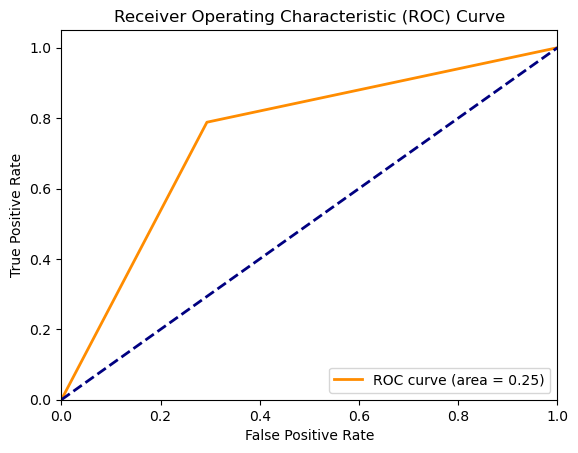

In [18]:
print(confusion_matrix(ytest, xtestprediction))
print(classification_report(ytest, xtestprediction))


from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(ytest, xtestprediction)
roc_auc = auc(tpr,fpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [19]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((56553, 21), (56553,), (14139, 21), (14139,))

In [20]:
from sklearn.svm import SVC

In [21]:


trainingaccuracies = []
trainingf1 = []

testingaccuracies = []
testingf1 = []

max_testing_A =0
max_training_A=0

max_testing_f1 =0
max_training_f1=0

n_maxA_tr =0
n_maxF1_tr =0

n_maxA_ts = 0
n_maxF1_ts=0

roc_scores = []

for n in range (1,8):
    clfpoly = SVC(kernel ='poly',degree = n)
    clfpoly.fit(xtrain,ytrain)
    
    xtrainprediction = clfpoly.predict(xtrain)
    trainingaccuracy = accuracy_score(ytrain,xtrainprediction)
    trainingaccuracies.append(trainingaccuracy)
    
    confusion_matrix(ytrain,xtrainprediction)
    tn_train, fp_train, fn_train, tp_train = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    
    f1score = f1_score(ytrain,xtrainprediction)
    trainingf1.append(f1score)
    
    testprediction = clfpoly.predict(xtest)
    testaccuracy = accuracy_score(ytest,testprediction)
    testingaccuracies.append(testaccuracy)
    
    confusion_matrix(ytest,testprediction)
    tn,fp,fn,tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    
    f1score_test = f1_score(ytest,testprediction)
    testingf1.append(f1score_test)
    
    if trainingaccuracy > max_training_A:
        max_training_A = trainingaccuracy
        n_maxA_tr = n
    
    if testingaccuracy > max_testing_A:
        max_testing_A = testingaccuracy
        n_maxA_ts = n
        
    if f1score > max_training_f1:
        max_training_f1 = f1score
        n_maxF1_tr = n
        
    if f1score_test > max_testing_f1:
        max_testing_f1 = f1score_test
        n_maxF1_ts = n
        
    fpr, tpr, _ = roc_curve(ytest, testprediction)
    roc_auc = auc(fpr, tpr)
    roc_scores.append(roc_auc)

    

print("Maximum testing F1 score is when n = ",n_maxF1_ts);
print("Maximum testing F1 score is ",max_testing_f1)
print("Maximum testing Accuracy is when n = ",n_maxA_ts)
print("Maximum testing Accuracy is ",max_testing_A)

print("Maximum training F1 score is when n = ",n_maxF1_tr)
print("Maximum training F1 score is ",max_training_f1)
print("Maximum training Accuracy is when n = ",n_maxA_tr)
print("Maximum training Accuracy is ",max_training_A)
    


Maximum testing F1 score is when n =  2
Maximum testing F1 score is  0.7678091618061471
Maximum testing Accuracy is when n =  1
Maximum testing Accuracy is  0.747719074899215
Maximum training F1 score is when n =  7
Maximum training F1 score is  0.8203734671125975
Maximum training Accuracy is when n =  7
Maximum training Accuracy is  0.8176577723551359


[[4963 2065]
 [1499 5612]]
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7028
         1.0       0.73      0.79      0.76      7111

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



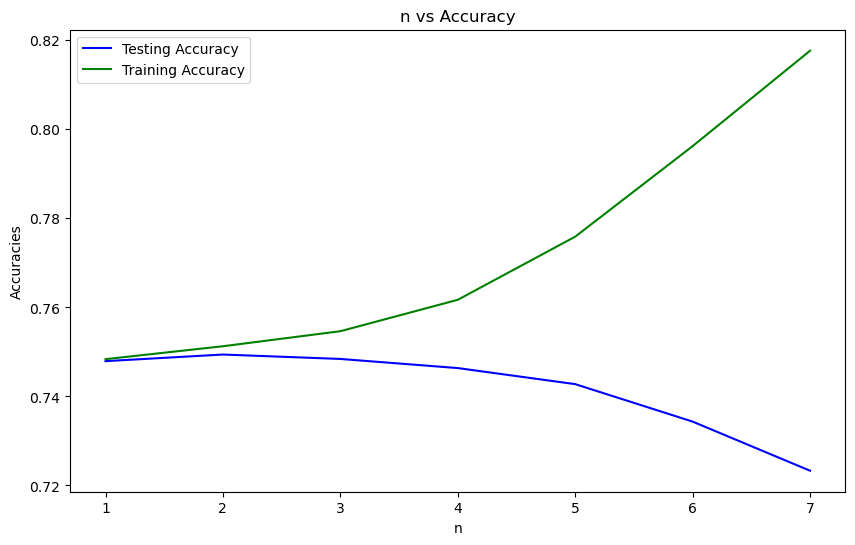

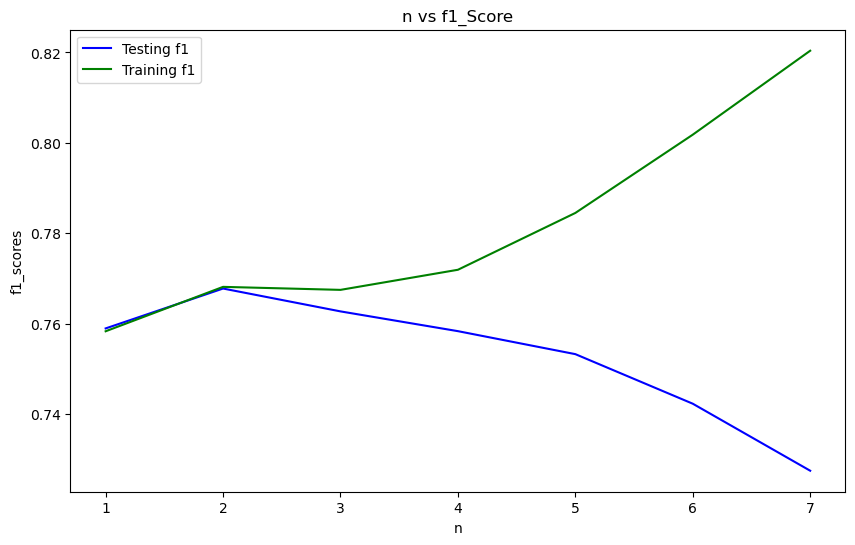

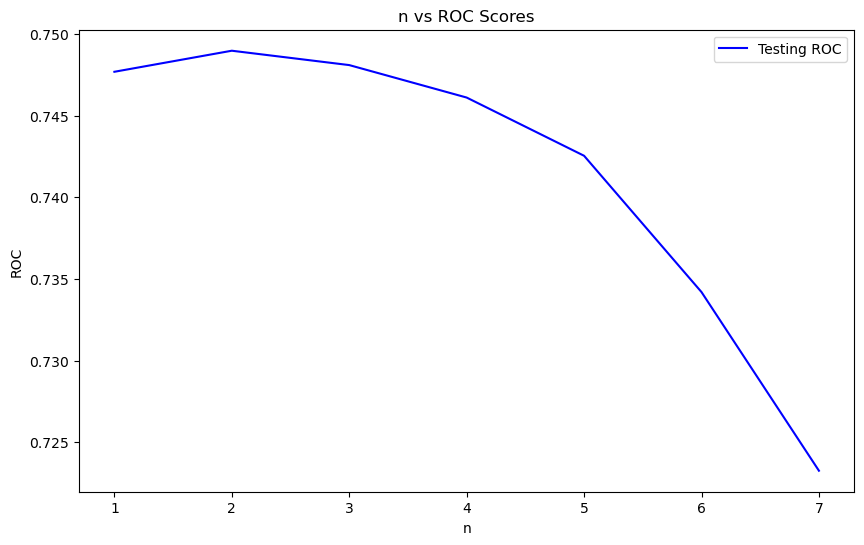

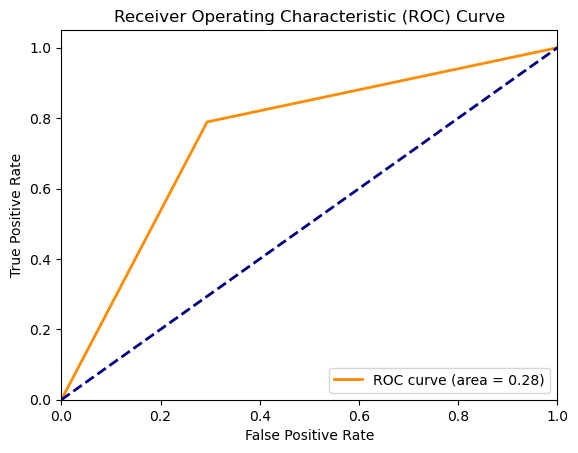

In [ ]:
#only testing accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,8),testingaccuracies,color='blue',markersize =10,label="testing accuracy")
plt.plot(range(1,8),trainingaccuracies,color='green',markersize =10,label="training accuracy")
plt.title('n vs Accuracy')
plt.xlabel('n')
plt.ylabel('Accuracies')
plt.legend(['Testing Accuracy', 'Training Accuracy'])

plt.figure(figsize=(10,6))
plt.plot(range(1,8),testingf1,color='blue',markersize =10,label='testing f1 Score')
plt.plot(range(1,8),trainingf1,color='green',markersize =10,label = 'training f1 Score')
plt.title('n vs f1_Score')
plt.xlabel('n')
plt.ylabel('f1_scores')
plt.legend(['Testing f1', 'Training f1'])

plt.figure(figsize=(10,6))
plt.plot(range(1,8),roc_scores,color = "blue",markersize = 10)
plt.title('n vs ROC Scores')
plt.xlabel('n')
plt.ylabel('ROC')
plt.legend(['Testing ROC'])

from sklearn.metrics import confusion_matrix, classification_report



svmpoly = SVC(kernel ='poly',degree = n_maxA_ts)
svmpoly.fit(xtrain,ytrain)
predictions = svmpoly.predict(xtest)
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

roc_auc = auc(tpr,fpr)

from sklearn.metrics import confusion_matrix, classification_report
fpr, tpr, thresholds = roc_curve(ytest, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

feature_selector = SelectKBest(score_func=f_classif, k=7)  

feature_selector.fit(xtrain, ytrain)

xtrainselected = feature_selector.transform(xtrain)

xtestselected = feature_selector.transform(xtest)


In [15]:
clfpoly = SVC(kernel ='poly',degree = 1)
clfpoly.fit(xtrainselected,ytrain)
ypredict = clfpoly.predict(xtestselected)
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      7073
         1.0       0.72      0.79      0.75      7066

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



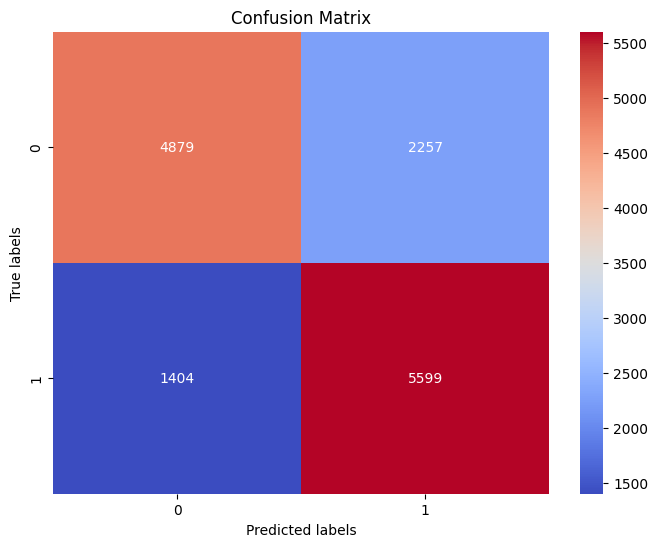

In [10]:
# Generate confusion matrix
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(ytest, ypredict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

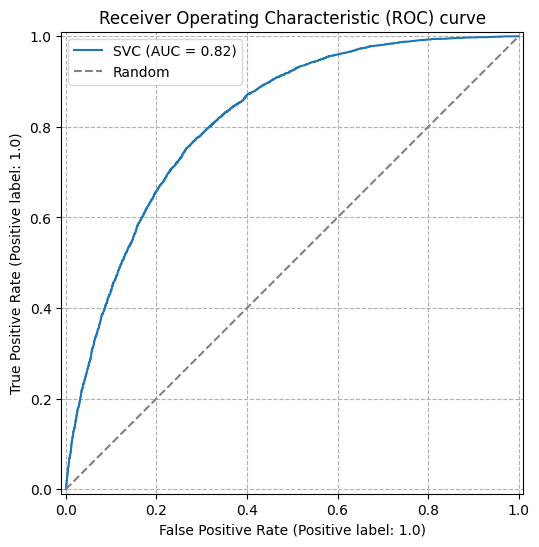

In [11]:
fig, ax_roc = plt.subplots(figsize=(8, 6))

clfpoly.fit(xtrainselected, ytrain)

# Plot ROC curve
roc_display = RocCurveDisplay.from_estimator(clfpoly, xtestselected, ytest, ax=ax_roc)

# Plot random line
ax_roc.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

ax_roc.set_title("Receiver Operating Characteristic (ROC) curve")
ax_roc.grid(linestyle="--")
ax_roc.legend()
plt.show()
